In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup as bs
import sqlite3
from datetime import date
from datetime import datetime as dt
import hashlib
import sys
import os
import locale
import re
import requests as rq
import wbdata as wb
from contextlib import contextmanager
import pytz
from datetime import timedelta
from currency_converter import CurrencyConverter
cc=CurrencyConverter()
from matplotlib import pyplot as plt
from sklearn import preprocessing as prep
import numpy as np

project_dir = '/home/mi/Dropbox/prog/python/tradeDB'
os.chdir(project_dir)

from importlib import reload
#from workers import sql
from workers import api
#from workers.common import read_json, hash_table
import tradeDB

In [18]:
ale= tradeDB.Trader()
pkn= tradeDB.Trader()
wig= tradeDB.Trader()
sp=tradeDB.Trader()


In [19]:
ale.get(tab='stock',symbol='ale',columns='name;symbol;val;vol;date', start_date='20-05-2023')
pkn.get(tab='stock',symbol='pkn')
wig.get(tab='index',symbol='wig')
sp.get(tab='indexes', symbol='^spx')

on 0: ...updating dates
|████████████████████████████████████████| 1/1 [100%] in 3.0s (0.33/s) 


In [20]:
ale+pkn+wig+sp
ale.pivot()
print(ale)

on 0: ...updating dates
|████████████████████████████████████████| 1/1 [100%] in 3.2s (0.31/s) 
name        ALLEGRO  PKNORLEN  S&P 500       WIG
date                                            
2023-05-18   36.275   58.4203  4198.05  63629.04
2023-05-19   38.345   59.3688  4191.98  64919.22
2023-05-22   38.580   59.5438  4192.63  65430.97
2023-05-23   37.865   59.0189  4145.58  65419.25
2023-05-24   36.800   59.2583  4115.24  64116.96
...             ...       ...      ...       ...
2023-10-26   29.000   66.1000  4137.23  70779.06
2023-10-27   28.960   65.8800  4117.37  70290.31
2023-10-30   29.715   65.6000  4166.82  71023.24
2023-10-31   30.150   66.5000  4193.80  71582.26
2023-11-01      NaN       NaN  4237.86       NaN

[120 rows x 4 columns]


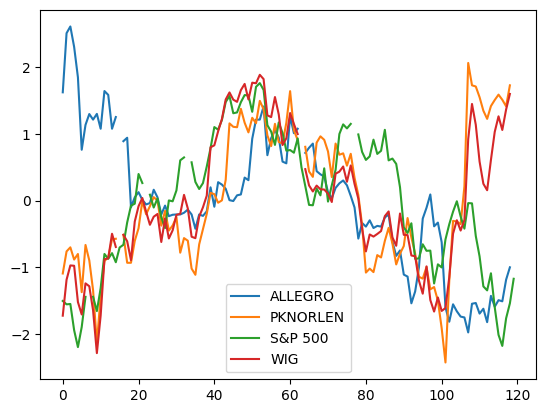

In [21]:
ale.plot()

In [22]:
ale.get(tab='stock',symbol='ale',columns='name;symbol;val;vol;date', start_date='20-05-2023', currency='usd')
pkn.get(tab='stock',symbol='pkn')
wig.get(tab='index',symbol='wig')
sp.get(tab='indexes', symbol='^spx')
ale+pkn+wig+sp

on 0: ...updating dates
|████████████████████████████████████████| 1/1 [100%] in 3.0s (0.33/s) 
on 0: ...updating dates
|████████████████████████████████████████| 1/1 [100%] in 3.1s (0.32/s) 


In [23]:
ale.pivot()
print(ale)

name         ALLEGRO  PKNORLEN  S&P 500       WIG
date                                             
2023-05-18  8.633977   58.4203  4198.05  63629.04
2023-05-19  9.167852   59.3688  4191.98  64919.22
2023-05-22  9.250720   59.5438  4192.63  65430.97
2023-05-23  9.066303   59.0189  4145.58  65419.25
2023-05-24  8.839376   59.2583  4115.24  64116.96
...              ...       ...      ...       ...
2023-10-26  6.842164   66.1000  4137.23  70779.06
2023-10-27  6.826957   65.8800  4117.37  70290.31
2023-10-30  7.071190   65.6000  4166.82  71023.24
2023-10-31  7.210063   66.5000  4193.80  71582.26
2023-11-01       NaN       NaN  4237.86       NaN

[120 rows x 4 columns]


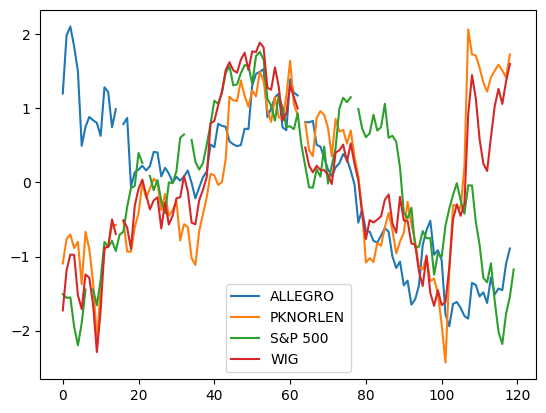

In [24]:
ale.plot()

In [29]:
wig.get(tab='index',symbol='wig', currency='usd')
wig+sp

on 0: ...updating dates


|████████████████████████████████████████| 1/1 [100%] in 2.9s (0.34/s) 


In [30]:
print(wig)

    symbol     name country  info     to_date           val   from_date  \
0      WIG      WIG      PL  NULL  2023-10-31  17118.162796  2023-05-18   
1      WIG      WIG      PL  NULL  2023-10-31  16901.188381  2023-05-18   
2      WIG      WIG      PL  NULL  2023-10-31  16570.058318  2023-05-18   
3      WIG      WIG      PL  NULL  2023-10-31  16699.377530  2023-05-18   
4      WIG      WIG      PL  NULL  2023-10-31  16568.117402  2023-05-18   
..     ...      ...     ...   ...         ...           ...         ...   
111   ^SPX  S&P 500      US  NULL  2023-11-01   4115.240000  2023-05-18   
112   ^SPX  S&P 500      US  NULL  2023-11-01   4145.580000  2023-05-18   
113   ^SPX  S&P 500      US  NULL  2023-11-01   4192.630000  2023-05-18   
114   ^SPX  S&P 500      US  NULL  2023-11-01   4191.980000  2023-05-18   
115   ^SPX  S&P 500      US  NULL  2023-11-01   4198.050000  2023-05-18   

           date industry  
0    2023-10-31     NULL  
1    2023-10-30     NULL  
2    2023-10-27   

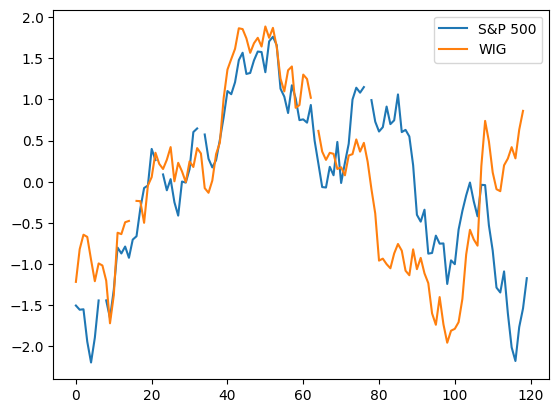

In [33]:
wig.pivot()
wig.plot()

In [37]:
wig.get(tab='index',symbol='wig', currency='%')
wig+sp

on 0: ...updating dates


|████████████████████████████████████████| 1/1 [100%] in 3.0s (0.33/s) 


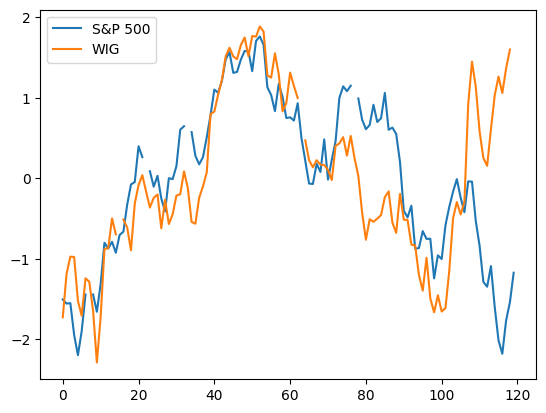

In [39]:
wig.pivot()
wig.plot()

In [55]:
# print all wig20 stocks
wig20 = tradeDB.Trader()
wig20.get(tab='indexes',symbol='wig20')
wig20_ind=tradeDB.Trader()
wig20_ind.get(tab='stock',components='wig20', columns='symbol')
wig20_sym=(';').join(wig20_ind.data['symbol'])
wig20_st = tradeDB.Trader()
wig20_st.get(tab='stock',symbol=wig20_sym, start_date='1-1-2023')
wig20_st+wig20

on 0: ...updating dates
|████████████████████████████████████████| 1/1 [100%] in 1.0s (0.96/s) 
Date range changed to last available data.
Select particular symbol(s) or name(s) if you want different dates.
on 0: ...updating dates
|████████████████████████████████████████| 1/1 [100%] in 4.9s (0.21/s) 


In [57]:
wig20_st.pivot()
wig20_st.data

name,ALIOR,ALLEGRO,ASSECOPOL,CDPROJEKT,CYFRPLSAT,DINOPL,JSW,KETY,KGHM,KRUK,...,MBANK,ORANGEPL,PEKAO,PEPCO,PGE,PKNORLEN,PKOBP,PZU,SANPL,WIG20
date,,,,,,,,,,,,,,,,,,,,,
2022-12-30,34.27,25.130,69.5750,128.638,17.610,375.3,58.16,416.996,125.720,298.174,...,296.0,6.30480,82.2843,39.52,6.884,59.1570,30.29,33.3657,259.4,1792.01
2023-01-02,34.70,25.440,70.1500,128.340,17.800,369.2,57.98,432.965,126.612,299.905,...,297.4,6.38663,82.3033,40.26,6.920,59.4885,30.27,32.6027,256.0,1791.47
2023-01-03,38.39,26.665,69.9583,128.003,17.700,359.4,55.00,442.546,129.439,302.983,...,322.2,6.35618,86.4699,40.04,6.832,60.0410,31.76,32.8193,268.6,1824.82
2023-01-04,41.05,27.000,70.2937,126.514,18.040,360.0,57.50,436.614,131.423,306.446,...,334.0,6.43230,88.9241,40.14,6.946,60.5567,32.67,33.7707,282.8,1855.05
2023-01-05,41.72,26.650,70.2458,131.535,18.540,352.8,56.52,437.983,135.390,307.600,...,336.4,6.54458,89.8754,41.14,6.898,57.5178,33.19,33.6765,287.0,1856.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-25,64.80,28.770,75.0500,105.600,13.240,380.1,43.52,693.000,110.800,467.400,...,519.8,7.67000,126.4500,17.50,7.088,65.8700,42.03,47.1600,429.8,2096.22
2023-10-26,66.00,29.000,75.5000,106.550,13.190,398.3,45.46,706.500,111.900,471.800,...,519.0,7.71000,127.6000,17.61,7.132,66.1000,42.65,47.3700,438.8,2120.96
2023-10-27,65.10,28.960,75.4500,106.700,12.960,395.4,45.09,701.000,111.350,460.200,...,505.2,7.52600,125.6500,17.67,7.150,65.8800,42.02,46.8100,439.8,2103.73


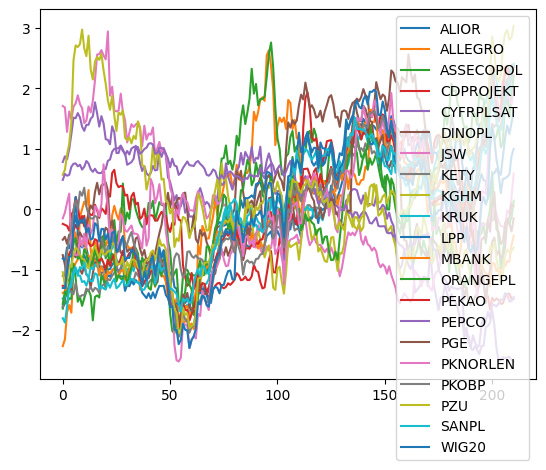

In [60]:
wig20_st.plot(normalize=True)